<h1 style='text-align: center; font-weight: bold; font-size: 2.2rem'>FGV - Desafios e Requisitos de um Projeto Analítico</h1>
<h2 style='color: #404040; text-align: center'>Waysides - Predição de desgaste de rodeiros de vagões GDT/GDU</h2>

# <a href='#0' style='color: black'>Membros</a>
- <a href='#0' style='color: black'>Igor Freitas</a>
- <a href='#0' style='color: black'>Leonardo Nascimento</a>
- <a href='#0' style='color: black'>Robson Cruz Silva</a>

# <a href='#0' style='color: black'>Conteúdo</a>

- <a href='#1' style='color: black; font-weight: bold'>1. Problema</a>
- <a href='#2' style='color: black; font-weight: bold'>2. Objetivo</a>
- <a href='#3' style='color: black; font-weight: bold'>3. Preparação dos Dados para Análise</a>
 - <a href='#31' style='color: black'>3.1. Bibliotecas</a>
 - <a href='#32' style='color: black'>3.1. Carregamento do Dataset</a>
 - <a href='#33' style='color: black'>3.2. Métodos</a>
- <a href='#4' style='color: black; font-weight: bold'>4. Análise Exploratória dos Dados</a>   
 - <a href='#41' style='color: black'>4.1. Conhecimento do Dataset</a>
 - <a href='#42' style='color: black'>4.2. Valores Faltantes</a>
   - <a href='#421' style='color: black'>4.2.1. Cava da Roda</a>
   - <a href='#422' style='color: black'>4.2.2. Ângulo do Friso da Rosa</a>
   - <a href='#423' style='color: black'>4.2.3. Tracking Error (TE)</a>
   - <a href='#424' style='color: black'>4.2.4. Alinhamento entre os Eixos (IAM)</a>
   - <a href='#425' style='color: black'>4.2.5. Deslocamento entre os Eixos (SHIFT)</a>
   - <a href='#426' style='color: black'>4.2.6. Ângulo Ataque Eixo Frontal Truque</a>
   - <a href='#427' style='color: black'>4.2.7. Ângulo Ataque Eixo Traseiro Truque</a>
   - <a href='#428' style='color: black'>4.2.8. Tracking Position Eixo Frontal Truque</a>
   - <a href='#429' style='color: black'>4.2.9. Tracking Position Eixo Traseiro Truque</a>
   - <a href='#4210' style='color: black'>4.2.10. Rotação Eixo</a>
   - <a href='#4211' style='color: black'>4.2.11. Sepenteamento (Hunting)</a>
   - <a href='#4212' style='color: black'>4.2.12. Espessura do Friso da Roda</a>
   - <a href='#4213' style='color: black'>4.2.13. Altura do Friso da Roda</a>
   - <a href='#4214' style='color: black'>4.2.14. Backup do Dataset</a>
 - <a href='#43' style='color: black'>4.3. Variável Alvo</a>
   - <a href='#431' style='color: black'>4.3.1. Probability Plot</a>
   - <a href='#432' style='color: black'>4.3.2. Desbalanceamento</a>
   - <a href='#433' style='color: black'>4.3.3. Análise Bivariada</a>
- <a href='#5' style='color: black; font-weight: bold'>5. Transformação</a>
 - <a href='#51' style='color: black'>5.1. Quantidade de Viagens</a>
 - <a href='#52' style='color: black'>5.2. Diferença da Espessura do Friso da Roda</a>
 - <a href='#53' style='color: black'>5.3. Diferença da Espessura do Friso da Roda na Próxma Leitura</a>
 - <a href='#54' style='color: black'>5.4. Espessura do Friso da Roda na Próxima Leitura</a>
 - <a href='#55' style='color: black'>5.5. Desgaste na Próxima Leitura (Target)</a>
 - <a href='#56' style='color: black'>5.6. Remoção Atributos</a>
 - <a href='#57' style='color: black'>5.7. Dummy</a>
 - <a href='#58' style='color: black'>5.8. Backup do Dataset</a>
- <a href='#6' style='color: black; font-weight: bold'>6. Modelagem</a>
 - <a href='#61' style='color: black'>6.1. Correlação</a>
 - <a href='#62' style='color: black'>6.2. Divisão dos Dados</a>
 - <a href='#63' style='color: black'>6.3. Comparação de Modelos</a>
 - <a href='#64' style='color: black'>6.4. Predição do Modelo</a>
- <a href='#7' style='color: black; font-weight: bold'>7. Avaliação</a>
 - <a href='#71' style='color: black'>7.1. Confusion Matrix</a>
 - <a href='#72' style='color: black'>7.2. Classification Report</a>
 - <a href='#73' style='color: black'>7.3. ROC Curve</a>
 
<hr>

# <a id='1' style='font-weight: bold'>1. Problema</a>

- A área não tem visibilidade do que vai acontecer com o ativo, antecipando as trocas;
- A cada troca o rodeiro é usinado e sua vida útil é reduzida;
- Incapacidade de visualização de desgastes acelerados em toda a frota de vagões;
- Muitos vagões apresentam reincidência de trocas e os fatores não são bem claros;

# <a id="2" style='font-weight: bold'>2. Objetivo</a>

Prever o desgaste das rodas dos vagões e fornecer uma visão futura da frota de rodeiros, para melhor planejamento de manutenção e compra de componentes. Deverá ser criado um modelo de classificação no qual informará se o friso da roda estará abaixo de 26 mm na próxima leitura.

# <a id='3' style='font-weight: bold'>3. Preparação dos Dados para Análise</a>

## <a id='31'>3.1. Bibliotecas</a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm, probplot
from scipy import stats

from sklearn.externals import joblib

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

warnings.filterwarnings('ignore')

pd.options.display.float_format = "{:.3f}".format

## <a id='32'>3.2. Carregamento do Dataset</a>

In [2]:
filepath = '../input/EFC_WAYSIDES.csv'

In [3]:
%%time

df = pd.read_csv(filepath, parse_dates=['DATA_HORA_LEITURA'])

CPU times: user 15.5 s, sys: 802 ms, total: 16.3 s
Wall time: 23.1 s


## <a id='33'>3.3. Métodos</a>

In [5]:
def detect_missing(data):
    total = data.isnull().sum()
    percentual = (data.isnull().sum() / data.shape[0]) * 100

    df_missing = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])

    return df_missing[df_missing.Total > 0].sort_values('Total', ascending=False)

In [6]:
def detect_outlier(data):
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return data[~((data < lower) | (data > upper))]

# <a id='4' style='font-weight: bold'>4. Análise Exploratória dos Dados</a>

## <a id='41'>4.1. Conhecimento do Dataframe</a>

In [6]:
print('O dataframe possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O dataframe possui 2966288 linhas e 26 colunas


In [7]:
pd.set_option('display.max_columns', 50)

In [8]:
df.head()

,ROW_ID,DATA_HORA_LEITURA,CODIGO_VAGAO,CODIGO_RODEIRO,CODIGO_RODA,LADO_RODA,EIXO_VAGAO,CICLO_RODEIRO,TRAIN_ID,SENTIDO_TREM,VELOCIDADE_ENTRADA_TREM,VELOCIDADE_SAIDA_TREM,POSICAO_VAGAO_COMPOSICAO,ANGULO_FRISO_RODA,ALTURA_FRISO_RODA,ESPESSURA_FRISO_RODA,CAVA_RODA,ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,ROTACAO_EIXO,ALINHAMENTO_ENTRE_EIXOS_(IAM),DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),TRACKING_ERROR_(TE),SERPENTEAMENTO_(HUNTING)
0,-912723440,2018-06-23 03:48:57,620355,6203551,6203551RIGHT,RIGHT,1,6203551RIGHT,15B2DC329,SLZ,35,24,161,62.474,28.750,29.350,0.230,-0.167,0.267,2.733,9.533,0.000,-0.433,3.733,-6.800,0.000
1,81518662,2018-05-30 22:42:52,612379,6123794,6123794RIGHT,RIGHT,4,6123794RIGHT,15B0F28EC,SLZ,58,41,59,63.803,30.380,31.250,0.280,0.200,-0.500,4.700,3.000,0.000,0.700,2.300,1.700,0.000
2,1336589413,2018-08-08 14:55:01,539531,5395312,5395312RIGHT,RIGHT,2,5395312RIGHT,15B6B0445,SLZ,47,29,271,nan,32.920,29.770,2.090,0.150,0.300,9.200,4.550,0.000,-0.150,8.350,4.650,0.000
3,1700466243,2018-07-01 01:35:29,67664,676642,0676642LEFT,LEFT,2,0676642LEFT,25B382FE1,SLZ,52,35,108,66.579,29.990,31.760,0.260,-0.700,0.200,-3.800,-3.600,0.000,-0.900,-4.000,-0.200,0.000
4,-819242175,2018-07-22 18:57:35,637568,6375684,6375684LEFT,LEFT,4,6375684LEFT,25B54D39F,SLZ,52,35,66,61.892,31.080,33.480,0.050,0.000,0.200,-3.100,-2.900,0.000,-0.200,-3.300,-0.200,0.000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966288 entries, 0 to 2966287
Data columns (total 26 columns):
ROW_ID                                    int64
DATA_HORA_LEITURA                         datetime64[ns]
CODIGO_VAGAO                              int64
CODIGO_RODEIRO                            int64
CODIGO_RODA                               object
LADO_RODA                                 object
EIXO_VAGAO                                int64
CICLO_RODEIRO                             object
TRAIN_ID                                  object
SENTIDO_TREM                              object
VELOCIDADE_ENTRADA_TREM                   int64
VELOCIDADE_SAIDA_TREM                     int64
POSICAO_VAGAO_COMPOSICAO                  int64
ANGULO_FRISO_RODA                         float64
ALTURA_FRISO_RODA                         float64
ESPESSURA_FRISO_RODA                      float64
CAVA_RODA                                 float64
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE         float64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ROW_ID,2966288.000,756587.293,1240152556.400,-2147483552.000,-1073585231.750,-50993.500,1075418380.500,2147482955.000
CODIGO_VAGAO,2966288.000,504732.594,265583.819,171.000,502638.000,551710.000,633155.000,922106.000
CODIGO_RODEIRO,2966288.000,5047328.442,2655838.189,1711.000,5026384.000,5517102.000,6331552.000,9221064.000
EIXO_VAGAO,2966288.000,2.500,1.118,1.000,1.000,3.000,3.000,6.000
VELOCIDADE_ENTRADA_TREM,2966288.000,45.852,8.843,15.000,39.000,48.000,53.000,69.000
VELOCIDADE_SAIDA_TREM,2966288.000,31.632,5.349,14.000,27.000,31.000,36.000,63.000
POSICAO_VAGAO_COMPOSICAO,2966288.000,163.287,95.292,1.000,81.000,162.000,245.000,334.000
ANGULO_FRISO_RODA,2678880.000,62.052,3.790,55.000,59.524,61.104,63.603,90.000
ALTURA_FRISO_RODA,2963934.000,30.278,1.671,25.000,28.970,30.160,31.470,43.800
ESPESSURA_FRISO_RODA,2955142.000,31.074,2.579,18.780,29.110,30.930,33.000,38.000


## <a id='42'>4.2. Valores Faltantes</a>

In [11]:
%%time
missing = detect_missing(df)

CPU times: user 4.7 s, sys: 257 ms, total: 4.95 s
Wall time: 3.25 s


In [12]:
missing

,Total,Percentual
CAVA_RODA,607049,20.465
ANGULO_FRISO_RODA,287408,9.689
TRACKING_ERROR_(TE),19763,0.666
ALINHAMENTO_ENTRE_EIXOS_(IAM),19731,0.665
DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),19731,0.665
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,19723,0.665
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665


### <a id='421'>4.2.1. Cava da Roda</a>

In [13]:
df.CAVA_RODA.describe()

count   2359239.000
mean          0.821
std           0.668
min           0.000
25%           0.260
50%           0.680
75%           1.280
max           8.050
Name: CAVA_RODA, dtype: float64

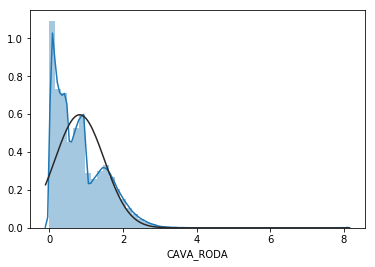

In [14]:
sns.distplot(df.CAVA_RODA.dropna(), fit=norm)

plt.show()

In [15]:
df.CAVA_RODA.skew()

0.8788047346966378

Como o coeficiente de assimetria é considerado moderado, será utilizado o valor da média para preenchimento dos valores faltantes.

In [16]:
df.CAVA_RODA.fillna(df.CAVA_RODA.mean(), inplace=True)

In [17]:
detect_missing(df)

,Total,Percentual
ANGULO_FRISO_RODA,287408,9.689
TRACKING_ERROR_(TE),19763,0.666
ALINHAMENTO_ENTRE_EIXOS_(IAM),19731,0.665
DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),19731,0.665
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,19723,0.665
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612


### <a id='422'>4.2.2. Ângulo do Friso da Roda</a>

In [18]:
df.ANGULO_FRISO_RODA.describe()

count   2678880.000
mean         62.052
std           3.790
min          55.000
25%          59.524
50%          61.104
75%          63.603
max          90.000
Name: ANGULO_FRISO_RODA, dtype: float64

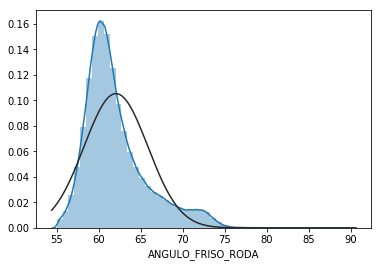

In [19]:
sns.distplot(df.ANGULO_FRISO_RODA.dropna(), fit=norm)

plt.show()

In [20]:
df.ANGULO_FRISO_RODA.skew()

1.2465382234009572

In [21]:
df.ANGULO_FRISO_RODA.fillna(df.ANGULO_FRISO_RODA.mean(), inplace=True)

In [22]:
detect_missing(df)

,Total,Percentual
TRACKING_ERROR_(TE),19763,0.666
ALINHAMENTO_ENTRE_EIXOS_(IAM),19731,0.665
DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),19731,0.665
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,19723,0.665
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376


### <a id='423'>4.2.3. Tracking Error (TE)</a>

In [23]:
df['TRACKING_ERROR_(TE)'].describe()

count   2946525.000
mean          0.390
std           6.534
min         -29.900
25%          -3.600
50%           0.400
75%           4.300
max          30.000
Name: TRACKING_ERROR_(TE), dtype: float64

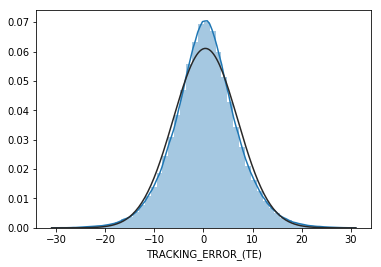

In [24]:
sns.distplot(df['TRACKING_ERROR_(TE)'].dropna(), fit=norm)

plt.show()

In [25]:
no_outliers = detect_outlier(df['TRACKING_ERROR_(TE)'].dropna())
no_outliers.describe()

count   2874834.000
mean          0.376
std           5.876
min         -15.450
25%          -3.500
50%           0.400
75%           4.200
max          16.150
Name: TRACKING_ERROR_(TE), dtype: float64

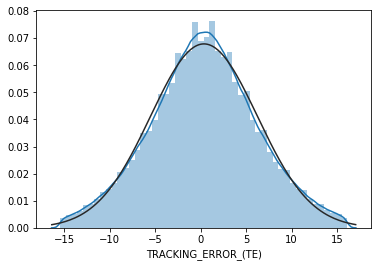

In [26]:
sns.distplot(no_outliers, fit=norm)

plt.show()

In [27]:
df['TRACKING_ERROR_(TE)'].fillna(no_outliers.mean(), inplace=True)

In [28]:
detect_missing(df)

,Total,Percentual
ALINHAMENTO_ENTRE_EIXOS_(IAM),19731,0.665
DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),19731,0.665
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,19723,0.665
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='424'>4.2.4. Alinhamento entre os Eixos (IAM)</a>

In [29]:
df['ALINHAMENTO_ENTRE_EIXOS_(IAM)'].describe()

count   2946557.000
mean         -0.019
std           0.375
min          -5.500
25%          -0.200
50%           0.000
75%           0.200
max           6.000
Name: ALINHAMENTO_ENTRE_EIXOS_(IAM), dtype: float64

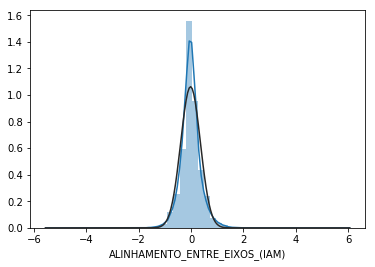

In [30]:
sns.distplot(df['ALINHAMENTO_ENTRE_EIXOS_(IAM)'].dropna(), fit=norm)

plt.show()

In [31]:
df['ALINHAMENTO_ENTRE_EIXOS_(IAM)'].fillna(df['ALINHAMENTO_ENTRE_EIXOS_(IAM)'].mean(), inplace=True)

In [32]:
detect_missing(df)

,Total,Percentual
DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),19731,0.665
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,19723,0.665
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='425'>4.2.5. Deslocamento entre os Eixos (SHIFT)</a>

In [33]:
df['DESLOCAMENTO_ENTRE_EIXOS_(SHIFT)'].describe()

count   2946557.000
mean         -0.043
std           3.699
min         -18.767
25%          -1.650
50%           0.000
75%           1.450
max          17.500
Name: DESLOCAMENTO_ENTRE_EIXOS_(SHIFT), dtype: float64

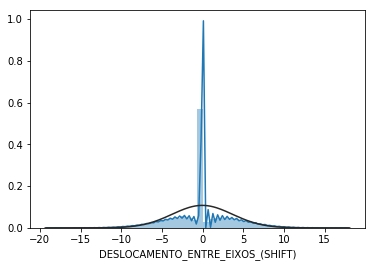

In [34]:
sns.distplot(df['DESLOCAMENTO_ENTRE_EIXOS_(SHIFT)'].dropna(), fit=norm)

plt.show()

In [35]:
df['DESLOCAMENTO_ENTRE_EIXOS_(SHIFT)'].fillna(df['DESLOCAMENTO_ENTRE_EIXOS_(SHIFT)'].mean(), inplace=True)

In [36]:
detect_missing(df)

,Total,Percentual
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,19723,0.665
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='426'>4.2.6. Ângulo Ataque Eixo Frontal Truque</a>

In [37]:
df['ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE'].describe()

count   2946565.000
mean         -0.043
std           0.270
min          -5.100
25%          -0.200
50%          -0.050
75%           0.100
max           6.100
Name: ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE, dtype: float64

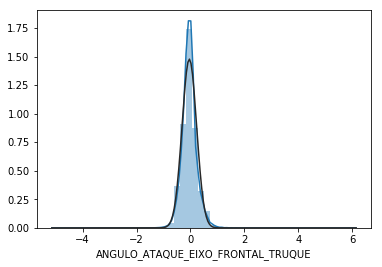

In [38]:
sns.distplot(df['ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE'].dropna(), fit=norm)

plt.show()

In [39]:
df['ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE'].fillna(df['ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE'].mean(), inplace=True)

In [40]:
detect_missing(df)

,Total,Percentual
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='427'>4.2.7. Ângulo Ataque Eixo Traseiro Truque</a>

In [41]:
df['ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE'].describe()

count   2946565.000
mean         -0.024
std           0.244
min          -3.300
25%          -0.200
50%           0.000
75%           0.100
max           3.633
Name: ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE, dtype: float64

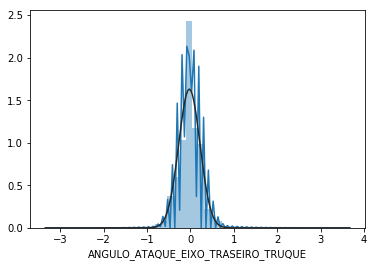

In [42]:
sns.distplot(df['ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE'].dropna(), fit=norm)

plt.show()

In [43]:
df['ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE'].fillna(df['ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE'].mean(), inplace=True)

In [44]:
detect_missing(df)

,Total,Percentual
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,19723,0.665
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='428'>4.2.8. Tracking Position Eixo Frontal Truque</a>

In [45]:
df['TRACKING_POSITION_EIXO_FRONTAL_TRUQUE'].describe()

count   2946565.000
mean          0.502
std           5.727
min         -23.900
25%          -3.100
50%           0.500
75%           4.167
max          23.500
Name: TRACKING_POSITION_EIXO_FRONTAL_TRUQUE, dtype: float64

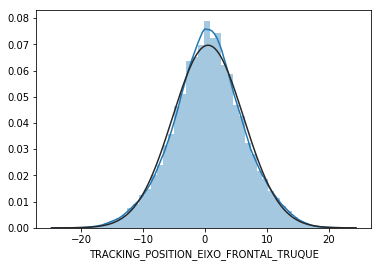

In [46]:
sns.distplot(df['TRACKING_POSITION_EIXO_FRONTAL_TRUQUE'].dropna(), fit=norm)

plt.show()

In [47]:
df['TRACKING_POSITION_EIXO_FRONTAL_TRUQUE'].fillna(df['TRACKING_POSITION_EIXO_FRONTAL_TRUQUE'].mean(), inplace=True)

In [48]:
detect_missing(df)

,Total,Percentual
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,19723,0.665
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='429'>4.2.9. Tracking Position Eixo Traseiro Truque</a>

In [49]:
df['TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE'].describe()

count   2946565.000
mean          0.111
std           5.024
min         -24.700
25%          -3.100
50%           0.100
75%           3.300
max          23.600
Name: TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE, dtype: float64

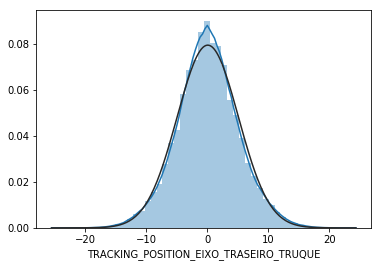

In [50]:
sns.distplot(df['TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE'].dropna(), fit=norm)

plt.show()

In [51]:
df['TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE'].fillna(df['TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE'].mean(), inplace=True)

In [52]:
detect_missing(df)

,Total,Percentual
ROTACAO_EIXO,19723,0.665
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='4210'>4.2.10 Rotação Eixo</a>

In [53]:
df['ROTACAO_EIXO'].describe()

count   2946565.000
mean          0.000
std           0.016
min          -1.633
25%           0.000
50%           0.000
75%           0.000
max           2.550
Name: ROTACAO_EIXO, dtype: float64

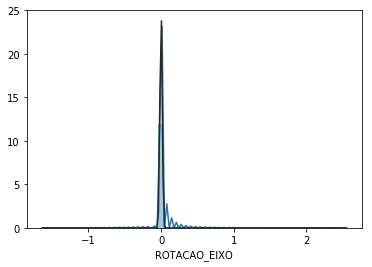

In [54]:
sns.distplot(df['ROTACAO_EIXO'].dropna(), fit=norm)

plt.show()

In [55]:
df['ROTACAO_EIXO'].fillna(df['ROTACAO_EIXO'].mean(), inplace=True)

In [56]:
detect_missing(df)

,Total,Percentual
SERPENTEAMENTO_(HUNTING),18143,0.612
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='4211'>4.2.11 Serpenteamento (Hunting)</a>

In [57]:
df['SERPENTEAMENTO_(HUNTING)'].describe()

count   2948145.000
mean          0.000
std           0.000
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           0.000
Name: SERPENTEAMENTO_(HUNTING), dtype: float64

In [58]:
df['SERPENTEAMENTO_(HUNTING)'].fillna(df['SERPENTEAMENTO_(HUNTING)'].mean(), inplace=True)

In [59]:
detect_missing(df)

,Total,Percentual
ESPESSURA_FRISO_RODA,11146,0.376
ALTURA_FRISO_RODA,2354,0.079


### <a id='4212'>4.2.12. Espessura do Friso da Roda</a>

In [60]:
df['ESPESSURA_FRISO_RODA'].describe()

count   2955142.000
mean         31.074
std           2.579
min          18.780
25%          29.110
50%          30.930
75%          33.000
max          38.000
Name: ESPESSURA_FRISO_RODA, dtype: float64

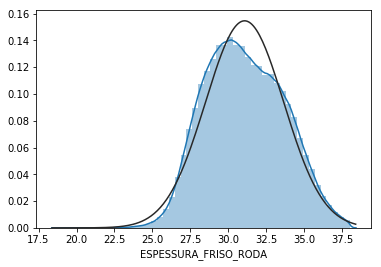

In [61]:
sns.distplot(df['ESPESSURA_FRISO_RODA'].dropna(), fit=norm)

plt.show()

In [62]:
df['ESPESSURA_FRISO_RODA'].fillna(df['ESPESSURA_FRISO_RODA'].mean(), inplace=True)

In [63]:
detect_missing(df)

,Total,Percentual
ALTURA_FRISO_RODA,2354,0.079


### <a id='4213'>4.2.13. Altura do Friso da Roda</a>

In [64]:
df['ALTURA_FRISO_RODA'].describe()

count   2963934.000
mean         30.278
std           1.671
min          25.000
25%          28.970
50%          30.160
75%          31.470
max          43.800
Name: ALTURA_FRISO_RODA, dtype: float64

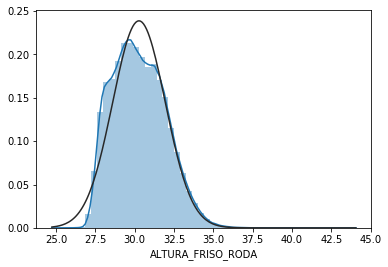

In [65]:
sns.distplot(df['ALTURA_FRISO_RODA'].dropna(), fit=norm)

plt.show()

In [66]:
df['ALTURA_FRISO_RODA'].fillna(df['ALTURA_FRISO_RODA'].mean(), inplace=True)

In [67]:
detect_missing(df)

,Total,Percentual


### <a id='4214'>4.2.14. Backup do Dataset</a>

In [106]:
joblib.dump(df, '../input/dataset_limpo.gz', compress=True)

['../input/dataset_limpo.gz']

## <a id='43'>4.3. Variável Alvo</a>

### <a id='431'>4.3.1. Probability Plot</a>

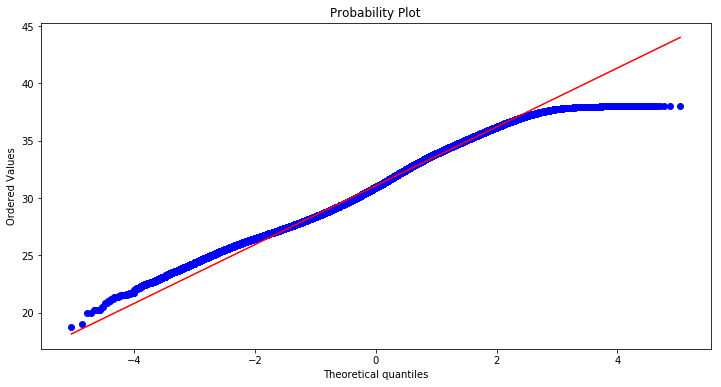

In [108]:
plt.figure(figsize=(12, 6))

stats.probplot(df.ESPESSURA_FRISO_RODA, plot=plt)

plt.show()

No gráfico de probabilidade acima, podemos observar que a medida que os valores aumentam, eles tendem a cair, gerando assim um valor de erro muito alto.

In [109]:
df['DESGASTADO'] = df['ESPESSURA_FRISO_RODA'].apply(lambda x: 1 if x < 26. else 0)

Criação da coluna [DESGASTADO] para categorizar as rodas que já sofreram desgaste ou não.

### <a id='432'>4.3.2. Desbalanceamento</a>

Percentual de distribuição da variável resposta:

Não (0).............: 98.80%
Sim (1).............: 1.20%


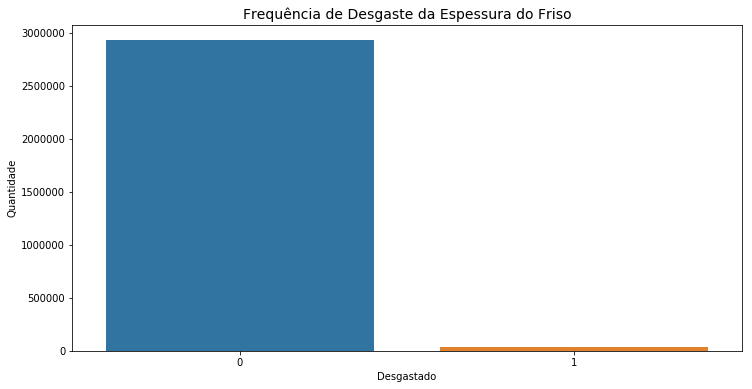

In [110]:
result = df['DESGASTADO'].value_counts()
index = result.index
values = result.values
total = df.shape[0]

perc_nao = values[0] / total * 100
perc_sim = values[1] / total * 100

print('Percentual de distribuição da variável resposta:\n')
print('{:.<20}: {:.2f}%'.format( 'Não (0)', perc_nao ))
print('{:.<20}: {:.2f}%'.format( 'Sim (1)', perc_sim ))

plt.figure(figsize=(12, 6))

sns.countplot(df.DESGASTADO)

plt.title('Frequência de Desgaste da Espessura do Friso', fontsize=14)
plt.xlabel('Desgastado')
plt.ylabel('Quantidade')

plt.show()

Ao analisar o gráfico de frequência acima, podemos observar um desbalanceamento no variável alvo.

### <a id='433'>4.3.3. Análise Bivariada</a>

<Figure size 864x432 with 0 Axes>

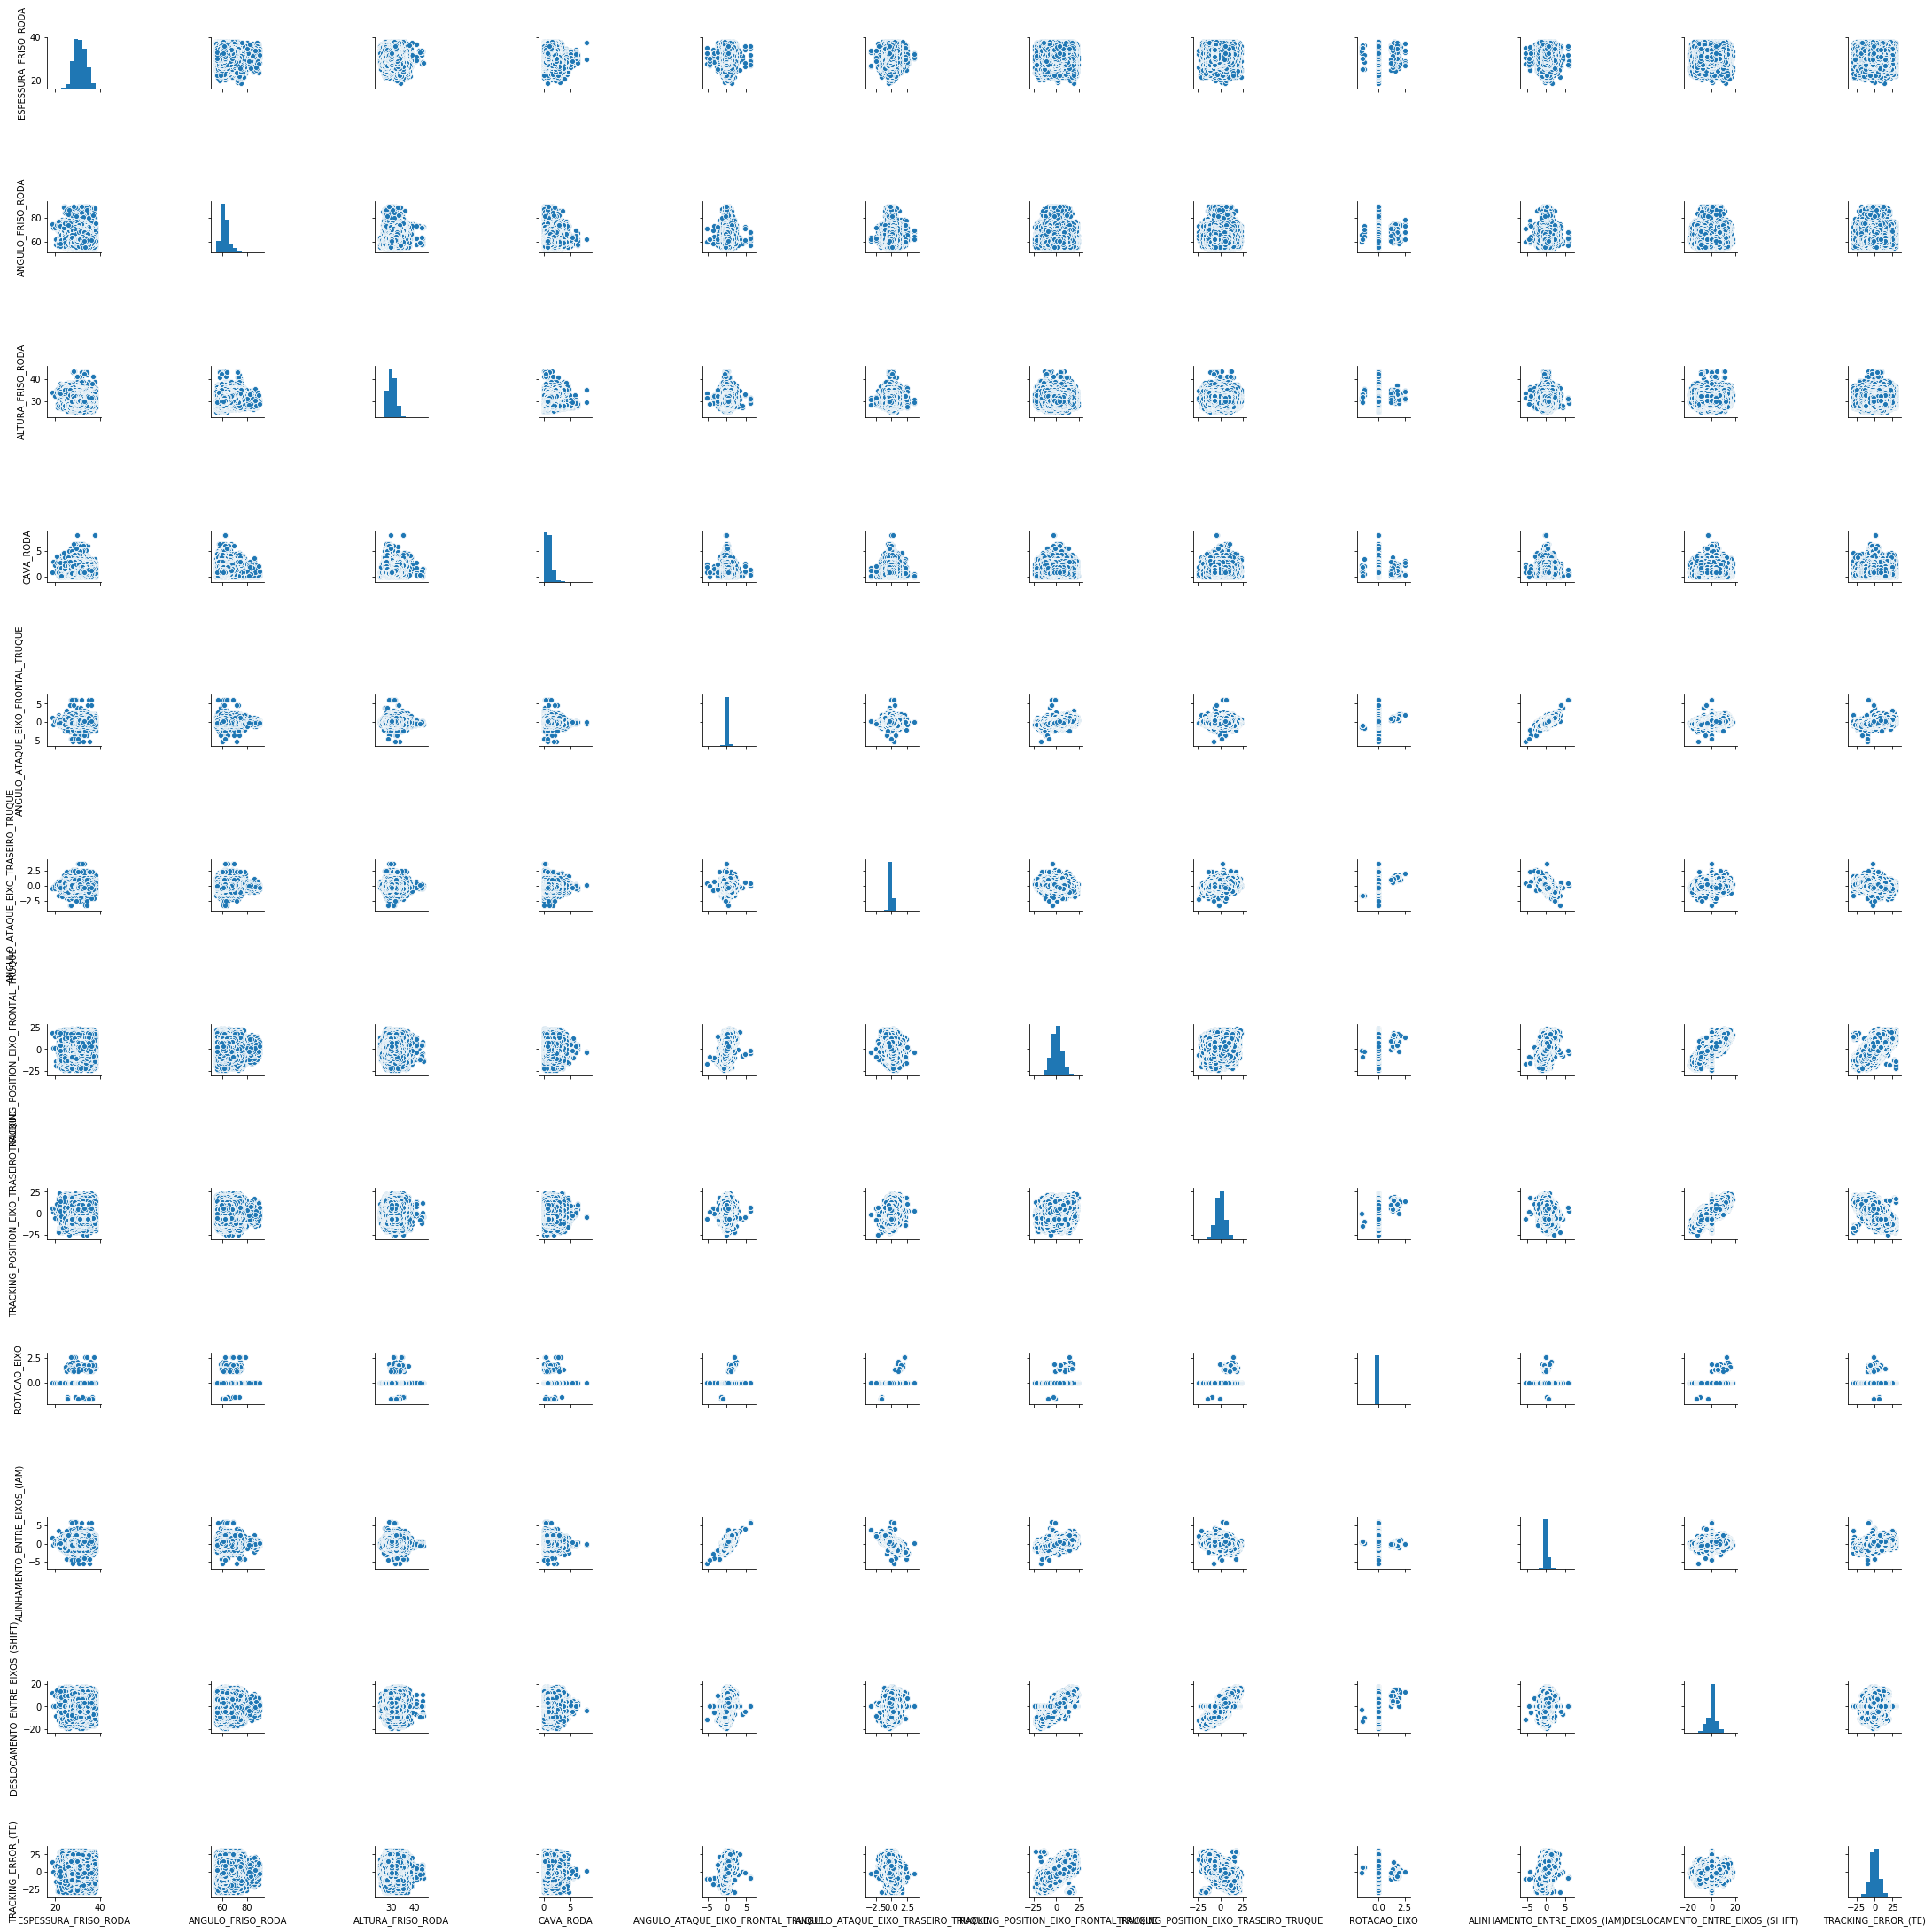

In [14]:
cols_pairplot = [
    'ESPESSURA_FRISO_RODA',
    'ANGULO_FRISO_RODA', 
    'ALTURA_FRISO_RODA', 
    'CAVA_RODA', 
    'ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE', 
    'ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE', 
    'TRACKING_POSITION_EIXO_FRONTAL_TRUQUE',
    'TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE',
    'ROTACAO_EIXO',
    'ALINHAMENTO_ENTRE_EIXOS_(IAM)', 
    'DESLOCAMENTO_ENTRE_EIXOS_(SHIFT)',
    'TRACKING_ERROR_(TE)'
]

plt.figure(figsize=(12, 6))

sns.pairplot(df[cols_pairplot])

plt.show()

# <a id='5' style='font-weight: bold'>5. Transformação</a>

## <a id='51'>5.1. Quantidade de Viagens</a>

In [219]:
# Adiciona um sequencial de 1 à n para cada código de roda, indicando a quantidade de viagens.
df['QTD_VIAGEM'] = df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).groupby(['CODIGO_RODA']).cumcount() + 1

## <a id='52'>5.2. Diferença da Espessura do Friso da Roda</a>

In [279]:
# Esta coluna recebe o valor da diferença do (registro atual - registro anterior)
df['DIF_ESPESSURA_FRISO_RODA'] = df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).groupby('CODIGO_RODA')['ESPESSURA_FRISO_RODA'].diff().fillna(0)

In [492]:
df[['DATA_HORA_LEITURA', 'CODIGO_RODA', 'ESPESSURA_FRISO_RODA', 'DIF_ESPESSURA_FRISO_RODA']].sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).head(12)

,DATA_HORA_LEITURA,CODIGO_RODA,ESPESSURA_FRISO_RODA,DIF_ESPESSURA_FRISO_RODA
2857222,2018-03-02 20:30:08,0001711LEFT,30.650,0.000
2857282,2018-03-04 03:50:44,0001711LEFT,30.030,-0.620
2857342,2018-03-07 02:40:41,0001711LEFT,30.080,0.050
2857402,2018-03-10 17:38:46,0001711LEFT,31.490,1.410
2857462,2018-03-11 00:58:51,0001711LEFT,31.200,-0.290
2857522,2018-03-18 04:48:35,0001711LEFT,30.260,-0.940
2857582,2018-03-18 17:46:49,0001711LEFT,30.900,0.640
2857642,2018-03-21 18:35:54,0001711LEFT,31.820,0.920
2857702,2018-03-22 10:51:23,0001711LEFT,30.900,-0.920
2857762,2018-04-01 20:31:49,0001711LEFT,31.240,0.340


In [494]:
df['DIF_ESPESSURA_FRISO_RODA'].describe()

count   2966288.000
mean         -0.016
std           0.932
min         -11.940
25%          -0.210
50%           0.000
75%           0.080
max          11.310
Name: DIF_ESPESSURA_FRISO_RODA, dtype: float64

## <a id='53'>5.3. Diferença da Espessura do Friso da Roda na Próxima Leitura</a>

In [496]:
'''
    Criação do atributo DIF_PROXIMA_LEITURA, ela tem por objetivo ser subtraída pelo valor da espessura do friso da roda, facilitando saber o valor do próximo registro. 
    Caso o seu valor seja NaN, ela será preenchida pelo valor da média da diferença da espessura do friso para o determinado código de roda.
'''

df['DIF_PROXIMA_LEITURA'] = df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).groupby('CODIGO_RODA')['DIF_ESPESSURA_FRISO_RODA'].shift(-1)
df.loc[df['DIF_PROXIMA_LEITURA'].isnull(), 'DIF_PROXIMA_LEITURA'] = df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).groupby('CODIGO_RODA')['DIF_ESPESSURA_FRISO_RODA'].transform('mean')

In [497]:
df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).head(12)

,ROW_ID,DATA_HORA_LEITURA,CODIGO_VAGAO,CODIGO_RODEIRO,CODIGO_RODA,LADO_RODA,EIXO_VAGAO,CICLO_RODEIRO,TRAIN_ID,SENTIDO_TREM,VELOCIDADE_ENTRADA_TREM,VELOCIDADE_SAIDA_TREM,POSICAO_VAGAO_COMPOSICAO,ANGULO_FRISO_RODA,ALTURA_FRISO_RODA,ESPESSURA_FRISO_RODA,CAVA_RODA,ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE,ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE,TRACKING_POSITION_EIXO_FRONTAL_TRUQUE,TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE,ROTACAO_EIXO,ALINHAMENTO_ENTRE_EIXOS_(IAM),DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),TRACKING_ERROR_(TE),SERPENTEAMENTO_(HUNTING),DESGASTADO,QTD_VIAGEM,DIF_ESPESSURA_FRISO_RODA,DIF_PROXIMA_LEITURA
2857222,-1298692589,2018-03-02 20:30:08,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15A99B450,SLZ,37,27,222,66.004,29.530,30.650,0.821,-0.033,-0.367,4.200,6.567,0.000,0.333,1.500,-2.367,0.000,0,1,0.000,-0.620
2857282,-835800888,2018-03-04 03:50:44,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15A9B6D14,SLZ,34,28,48,67.082,29.250,30.030,0.821,-0.700,-0.200,5.700,6.700,0.000,-0.500,0.000,-1.000,0.000,0,2,-0.620,0.050
2857342,391004759,2018-03-07 02:40:41,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15A9F5129,SLZ,26,26,158,67.082,28.930,30.080,0.821,-0.167,-0.200,3.100,4.600,0.000,0.033,0.000,-1.500,0.000,0,3,0.050,1.410
2857402,-687182548,2018-03-10 17:38:46,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AA41826,SLZ,27,25,1,64.792,29.680,31.490,0.821,-0.367,-0.200,3.867,6.200,0.000,-0.167,1.633,-2.333,0.000,0,4,1.410,-0.290
2857462,-1298175374,2018-03-11 00:58:51,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AA47F4B,SLZ,26,23,267,67.995,29.240,31.200,0.821,-0.300,-0.167,2.767,4.500,0.000,-0.133,0.000,-1.733,0.000,0,5,-0.290,-0.940
2857522,-1142183833,2018-03-18 04:48:35,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AADEFA3,SLZ,52,34,158,69.148,29.460,30.260,0.821,0.000,-0.100,0.800,2.750,0.000,0.100,0.000,-1.950,0.000,0,6,-0.940,0.640
2857582,1155282241,2018-03-18 17:46:49,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AAEA609,SLZ,36,27,1,69.148,29.710,30.900,0.821,-0.150,-0.350,3.650,5.650,0.000,0.200,1.750,-2.000,0.000,0,7,0.640,0.920
2857642,1905721762,2018-03-21 18:35:54,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AB2A60A,SLZ,54,36,159,69.543,30.250,31.820,0.821,-0.267,-0.167,2.100,4.633,0.000,-0.100,0.000,-2.533,0.000,0,8,0.920,-0.920
2857702,-463970658,2018-03-22 10:51:23,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AB38AAB,SLZ,36,27,222,66.011,29.520,30.900,0.821,-0.167,0.033,4.067,5.733,0.000,-0.200,1.767,-1.667,0.000,0,9,-0.920,0.340
2857762,912155415,2018-04-01 20:31:49,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AC141B5,SLZ,30,23,160,66.011,30.250,31.240,0.821,-0.167,0.033,4.067,5.733,0.000,-0.200,1.767,-1.667,0.000,0,10,0.340,0.370


## <a id='54'>5.4. Espessura do Friso na Próxima Leitura</a>

In [77]:
# Criação do atributo DESGASTE_PROXIMA_LEITURA. Esta coluna recebá o resultado da equação (ESPESSURA_FRISO_RODA - DIF_PROXIMA_LEITURA), resultando no valor do próximo registro.

espessura = df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA'])['ESPESSURA_FRISO_RODA']
dif_espessura = df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA'])['DIF_PROXIMA_LEITURA']

prox_leitura = espessura + dif_espessura

df['ESPESSURA_PROXIMA_LEITURA'] = prox_leitura

In [78]:
df[['DATA_HORA_LEITURA', 'CODIGO_RODA', 'ESPESSURA_FRISO_RODA', 'ESPESSURA_PROXIMA_LEITURA']].sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).head(12)

,DATA_HORA_LEITURA,CODIGO_RODA,ESPESSURA_FRISO_RODA,ESPESSURA_PROXIMA_LEITURA
2857222,2018-03-02 20:30:08,0001711LEFT,30.650,30.030
2857282,2018-03-04 03:50:44,0001711LEFT,30.030,30.080
2857342,2018-03-07 02:40:41,0001711LEFT,30.080,31.490
2857402,2018-03-10 17:38:46,0001711LEFT,31.490,31.200
2857462,2018-03-11 00:58:51,0001711LEFT,31.200,30.260
2857522,2018-03-18 04:48:35,0001711LEFT,30.260,30.900
2857582,2018-03-18 17:46:49,0001711LEFT,30.900,31.820
2857642,2018-03-21 18:35:54,0001711LEFT,31.820,30.900
2857702,2018-03-22 10:51:23,0001711LEFT,30.900,31.240
2857762,2018-04-01 20:31:49,0001711LEFT,31.240,31.610


## <a id='55'>5.5. Desgaste na Próxima Leitura (Target)</a>

In [79]:
# Criação do atributo PROXIMA_LEITURA. Tem por objetivo ser a variável resposta, onde indicará se o registro da próxima leitura será inferior à 26 milímetros.
df['DESGASTE_PROXIMA_LEITURA'] = df['ESPESSURA_PROXIMA_LEITURA'].apply(lambda x: 1 if x < 26 else 0)

In [80]:
df.sort_values(['CODIGO_RODA', 'DATA_HORA_LEITURA']).head(12)

,ROW_ID,DATA_HORA_LEITURA,CODIGO_VAGAO,CODIGO_RODEIRO,CODIGO_RODA,LADO_RODA,EIXO_VAGAO,CICLO_RODEIRO,TRAIN_ID,SENTIDO_TREM,...,DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),TRACKING_ERROR_(TE),SERPENTEAMENTO_(HUNTING),DESGASTADO,QTD_VIAGEM,DIF_ESPESSURA_FRISO_RODA,DIF_PROXIMA_LEITURA,EXPESSURA_PROXIMA_LEITURA,DESGASTE_PROXIMA_LEITURA,ESPESSURA_PROXIMA_LEITURA
2857222,-1298692589,2018-03-02 20:30:08,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15A99B450,SLZ,...,1.500,-2.367,0.000,0,1,0.000,-0.620,30.030,0,30.030
2857282,-835800888,2018-03-04 03:50:44,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15A9B6D14,SLZ,...,0.000,-1.000,0.000,0,2,-0.620,0.050,30.080,0,30.080
2857342,391004759,2018-03-07 02:40:41,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15A9F5129,SLZ,...,0.000,-1.500,0.000,0,3,0.050,1.410,31.490,0,31.490
2857402,-687182548,2018-03-10 17:38:46,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AA41826,SLZ,...,1.633,-2.333,0.000,0,4,1.410,-0.290,31.200,0,31.200
2857462,-1298175374,2018-03-11 00:58:51,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AA47F4B,SLZ,...,0.000,-1.733,0.000,0,5,-0.290,-0.940,30.260,0,30.260
2857522,-1142183833,2018-03-18 04:48:35,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AADEFA3,SLZ,...,0.000,-1.950,0.000,0,6,-0.940,0.640,30.900,0,30.900
2857582,1155282241,2018-03-18 17:46:49,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AAEA609,SLZ,...,1.750,-2.000,0.000,0,7,0.640,0.920,31.820,0,31.820
2857642,1905721762,2018-03-21 18:35:54,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AB2A60A,SLZ,...,0.000,-2.533,0.000,0,8,0.920,-0.920,30.900,0,30.900
2857702,-463970658,2018-03-22 10:51:23,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AB38AAB,SLZ,...,1.767,-1.667,0.000,0,9,-0.920,0.340,31.240,0,31.240
2857762,912155415,2018-04-01 20:31:49,171,1711,0001711LEFT,LEFT,1,0001711LEFT,15AC141B5,SLZ,...,1.767,-1.667,0.000,0,10,0.340,0.370,31.610,0,31.610


## <a id='56'>5.6. Remoção de Atributos</a>

In [81]:
# Removendo colunas identificadores (ID's) e outras que possuem somente um valor (analisado anteriormente no heatmap).
cols_remove = ['ROW_ID', 'CODIGO_VAGAO', 'CODIGO_RODEIRO', 'CODIGO_RODA', 'CICLO_RODEIRO', 'TRAIN_ID', 'SENTIDO_TREM', 'SERPENTEAMENTO_(HUNTING)']

df2 = df.drop(cols_remove, axis=1)

In [82]:
df2.head()

,DATA_HORA_LEITURA,LADO_RODA,EIXO_VAGAO,VELOCIDADE_ENTRADA_TREM,VELOCIDADE_SAIDA_TREM,POSICAO_VAGAO_COMPOSICAO,ANGULO_FRISO_RODA,ALTURA_FRISO_RODA,ESPESSURA_FRISO_RODA,CAVA_RODA,...,ALINHAMENTO_ENTRE_EIXOS_(IAM),DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),TRACKING_ERROR_(TE),DESGASTADO,QTD_VIAGEM,DIF_ESPESSURA_FRISO_RODA,DIF_PROXIMA_LEITURA,EXPESSURA_PROXIMA_LEITURA,DESGASTE_PROXIMA_LEITURA,ESPESSURA_PROXIMA_LEITURA
2857222,2018-03-02 20:30:08,LEFT,1,37,27,222,66.004,29.530,30.650,0.821,...,0.333,1.500,-2.367,0,1,0.000,-0.620,30.030,0,30.030
2857282,2018-03-04 03:50:44,LEFT,1,34,28,48,67.082,29.250,30.030,0.821,...,-0.500,0.000,-1.000,0,2,-0.620,0.050,30.080,0,30.080
2857342,2018-03-07 02:40:41,LEFT,1,26,26,158,67.082,28.930,30.080,0.821,...,0.033,0.000,-1.500,0,3,0.050,1.410,31.490,0,31.490
2857402,2018-03-10 17:38:46,LEFT,1,27,25,1,64.792,29.680,31.490,0.821,...,-0.167,1.633,-2.333,0,4,1.410,-0.290,31.200,0,31.200
2857462,2018-03-11 00:58:51,LEFT,1,26,23,267,67.995,29.240,31.200,0.821,...,-0.133,0.000,-1.733,0,5,-0.290,-0.940,30.260,0,30.260


## <a id='57'>5.7. Dummy</a>

In [83]:
feat_cat = df2.select_dtypes(include=np.object).columns
feat_num = df2.select_dtypes(exclude=np.object).columns

len(feat_cat), len(feat_num)

(1, 24)

In [84]:
df3 = df2.copy()

for i in feat_cat:
    df3[i] = pd.get_dummies(df3[i], prefix='{}'.format(i))
    
df3.shape

(2966288, 25)

In [85]:
df3.head()

,DATA_HORA_LEITURA,LADO_RODA,EIXO_VAGAO,VELOCIDADE_ENTRADA_TREM,VELOCIDADE_SAIDA_TREM,POSICAO_VAGAO_COMPOSICAO,ANGULO_FRISO_RODA,ALTURA_FRISO_RODA,ESPESSURA_FRISO_RODA,CAVA_RODA,...,ALINHAMENTO_ENTRE_EIXOS_(IAM),DESLOCAMENTO_ENTRE_EIXOS_(SHIFT),TRACKING_ERROR_(TE),DESGASTADO,QTD_VIAGEM,DIF_ESPESSURA_FRISO_RODA,DIF_PROXIMA_LEITURA,EXPESSURA_PROXIMA_LEITURA,DESGASTE_PROXIMA_LEITURA,ESPESSURA_PROXIMA_LEITURA
2857222,2018-03-02 20:30:08,1,1,37,27,222,66.004,29.530,30.650,0.821,...,0.333,1.500,-2.367,0,1,0.000,-0.620,30.030,0,30.030
2857282,2018-03-04 03:50:44,1,1,34,28,48,67.082,29.250,30.030,0.821,...,-0.500,0.000,-1.000,0,2,-0.620,0.050,30.080,0,30.080
2857342,2018-03-07 02:40:41,1,1,26,26,158,67.082,28.930,30.080,0.821,...,0.033,0.000,-1.500,0,3,0.050,1.410,31.490,0,31.490
2857402,2018-03-10 17:38:46,1,1,27,25,1,64.792,29.680,31.490,0.821,...,-0.167,1.633,-2.333,0,4,1.410,-0.290,31.200,0,31.200
2857462,2018-03-11 00:58:51,1,1,26,23,267,67.995,29.240,31.200,0.821,...,-0.133,0.000,-1.733,0,5,-0.290,-0.940,30.260,0,30.260


## <a id='58'>5.8. Backup do Dataset</a>

In [89]:
# Backup do dataset transformado
joblib.dump(df3, '../input/dataset_dummy.gz', compress=True)

['../input/dataset_dummy.gz']

In [9]:
df3 = joblib.load('../input/dataset_dummy.gz')

# <a id='6' style='font-weight: bold'>6. Modelagem</a>

## <a id='61'>6.1. Correlação</a>

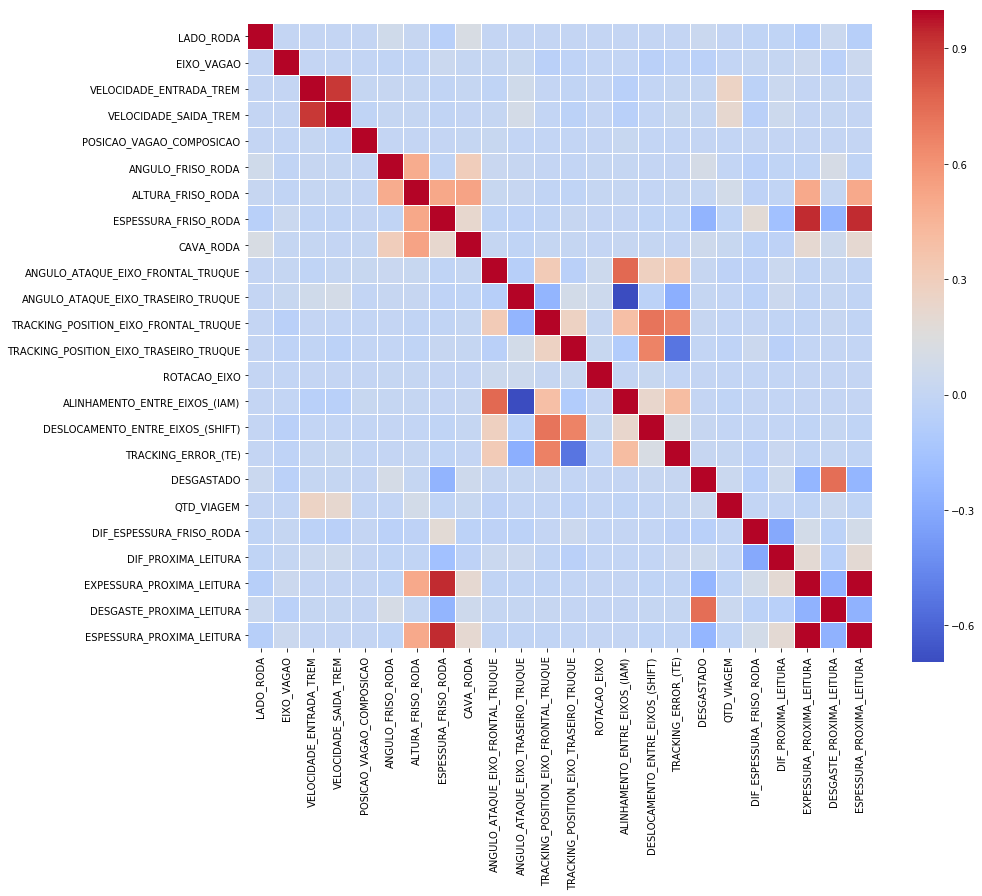

In [86]:
plt.figure(figsize=(14, 12))

sns.heatmap(df3.corr(), linewidths=0.01, cmap='coolwarm', square=True)

plt.show()

In [9]:
df3.corr()['DESGASTE_PROXIMA_LEITURA'].sort_values(ascending=False)

DESGASTE_PROXIMA_LEITURA                  1.000
DESGASTADO                                0.740
ANGULO_FRISO_RODA                         0.104
CAVA_RODA                                 0.058
LADO_RODA                                 0.038
QTD_VIAGEM                                0.036
TRACKING_POSITION_EIXO_FRONTAL_TRUQUE     0.013
ALTURA_FRISO_RODA                         0.012
DESLOCAMENTO_ENTRE_EIXOS_(SHIFT)          0.011
TRACKING_ERROR_(TE)                       0.009
VELOCIDADE_ENTRADA_TREM                   0.008
ANGULO_ATAQUE_EIXO_FRONTAL_TRUQUE         0.007
ANGULO_ATAQUE_EIXO_TRASEIRO_TRUQUE        0.007
VELOCIDADE_SAIDA_TREM                     0.007
TRACKING_POSITION_EIXO_TRASEIRO_TRUQUE    0.002
ROTACAO_EIXO                              0.001
ALINHAMENTO_ENTRE_EIXOS_(IAM)             0.001
POSICAO_VAGAO_COMPOSICAO                  0.000
DIF_ESPESSURA_FRISO_RODA                 -0.034
EIXO_VAGAO                               -0.043
DIF_PROXIMA_LEITURA                     

In [87]:
correlacoes = df3.corr()['DESGASTE_PROXIMA_LEITURA'].sort_values(ascending=False)

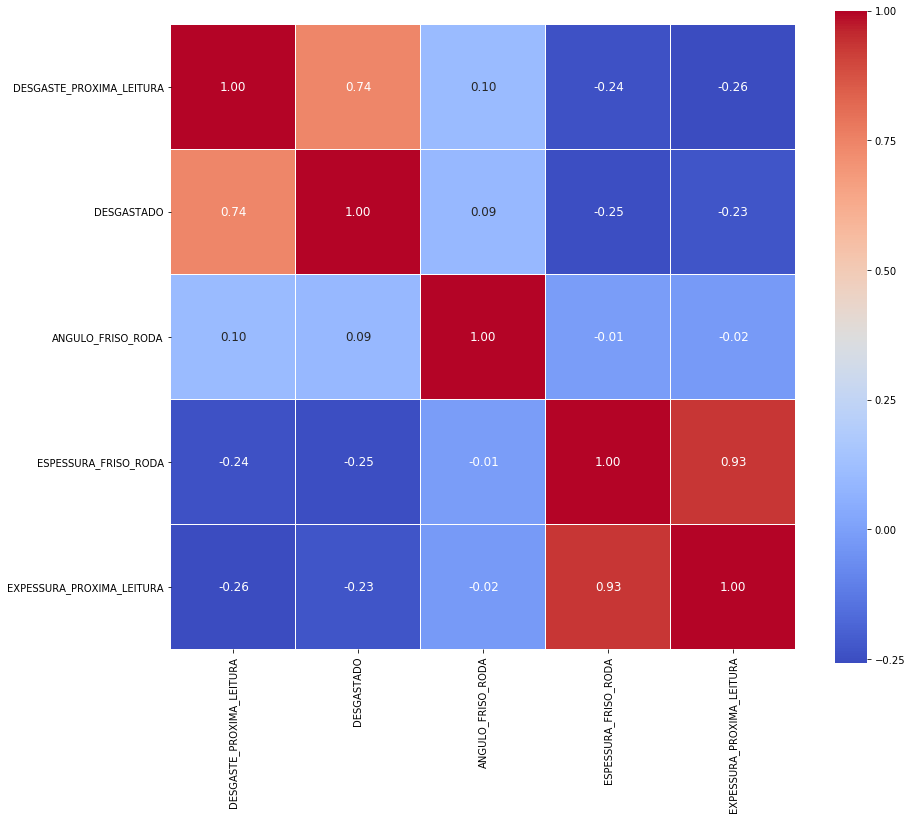

In [66]:
all_cols_corr = correlacoes.index

idx = np.where(np.abs(correlacoes.values) > 0.1)

cols_corr = all_cols_corr[idx]

coefs_corr = df3[cols_corr].corr().T.values

f, ax = plt.subplots(figsize = (14, 12))

hm = sns.heatmap(
    coefs_corr, 
    cmap='coolwarm', 
    linecolor='white', 
    linewidths=0.01, 
    annot_kws={'size': 12}, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    yticklabels=cols_corr.values, 
    xticklabels=cols_corr.values
)

plt.show()

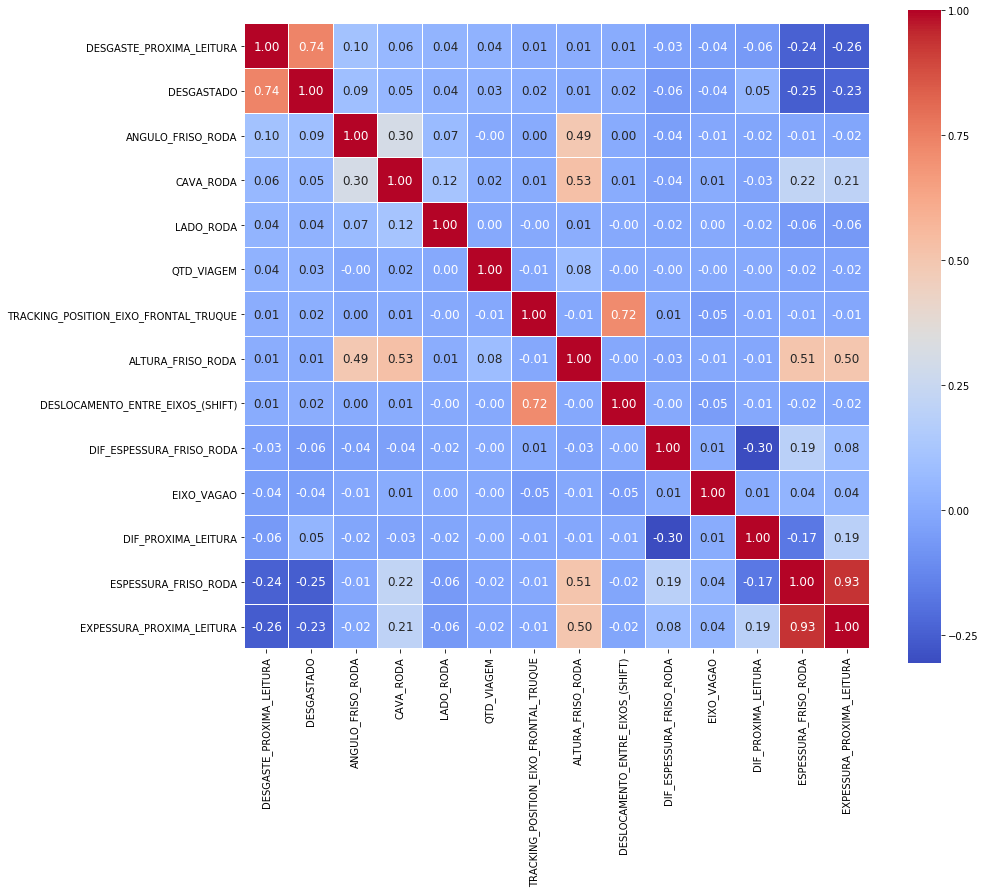

In [70]:
all_cols_corr = correlacoes.index

idx = np.where(np.abs(correlacoes.values) > 0.01)

cols_corr = all_cols_corr[idx]

coefs_corr = df3[cols_corr].corr().T.values

f, ax = plt.subplots(figsize = (14, 12))

hm = sns.heatmap(
    coefs_corr, 
    cmap='coolwarm', 
    linecolor='white', 
    linewidths=0.01, 
    annot_kws={'size': 12}, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f', 
    yticklabels=cols_corr.values, 
    xticklabels=cols_corr.values
)

plt.show()

## <a id='62'>6.2. Divisão dos Dados</a>

In [10]:
X, y = df3.drop(['DATA_HORA_LEITURA', 'DESGASTE_PROXIMA_LEITURA'], axis=True), df3[['DESGASTE_PROXIMA_LEITURA']].values

In [144]:
num_folds = 10
seed = 0

## <a id='63'>6.3. Comparação de Modelos</a>

In [75]:
modelos = []

modelos.append(('LR', LogisticRegression()))
# modelos.append(('CART', DecisionTreeClassifier()))
# modelos.append(('KNN', KNeighborsClassifier()))
# modelos.append(('LDA', LinearDiscriminantAnalysis()))
# modelos.append(('NB', GaussianNB()))
# modelos.append(('SVM', SVC()))
# modelos.append(('GBC', GradientBoostingClassifier()))
# modelos.append(('ABC', AdaBoostClassifier()))
# modelos.append(('XGBC', XGBClassifier()))

LR: 0.999801 (0.000085)


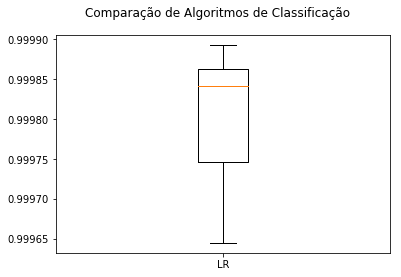

In [76]:
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(modelo, X, y, cv=kfold, scoring='roc_auc')
    
    resultados.append(cv_results)
    nomes.append(nome)
    
    mensagem = '%s: %f (%f)' % (nome, cv_results.mean(), cv_results.std())
    print(mensagem)
    
fig = plt.figure()

fig.suptitle('Comparação de Algoritmos de Classificação')

ax = fig.add_subplot(111)

plt.boxplot(resultados)

ax.set_xticklabels(nomes)

plt.show()

In [146]:
clf_1 = LogisticRegression()

## <a id='64'>6.4. Predição do Modelo</a>

In [93]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [ ]:
%%time
y_pred = cross_val_predict(clf_1, X, y, cv=kfold)

In [107]:
%%time
y_proba = cross_val_predict(clf_1, X, y, cv=kfold, method='predict_proba')

CPU times: user 24min 4s, sys: 3.86 s, total: 24min 8s
Wall time: 23min 39s


In [108]:
# Devido a demora no processamento da predição, foi criado um arquivo de backup com as predições realizadas.
joblib.dump(y_pred, '../input/predictions.gz', compress=True)
joblib.dump(y_proba, '../input/predictions_proba.gz', compress=True)

['../input/predictions_proba.gz']

In [6]:
y_pred = joblib.load('../input/predictions.gz')
y_proba = joblib.load('../input/predictions_proba.gz')

# <a id='7' style='font-weight: bold'>7. Avaliação</a>

## <a id='71'>7.1. Confusion Matrix</a>

In [149]:
print(confusion_matrix(y, y_pred))

[[2926660    1375]
 [   4886   33367]]


## <a id='72'>7.2. Classification Report</a>

In [98]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2928035
           1       0.96      0.87      0.91     38253

   micro avg       1.00      1.00      1.00   2966288
   macro avg       0.98      0.94      0.96   2966288
weighted avg       1.00      1.00      1.00   2966288



## <a id='73'>7.3. ROC Curve</a>

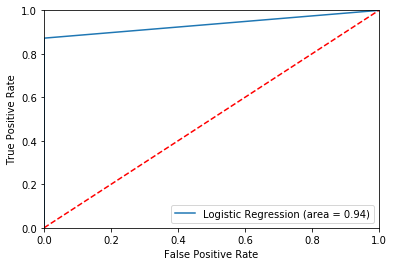

In [11]:
clf_1_auc_score = roc_auc_score(y, y_pred)
fpr, tpr, threshold = roc_curve(y, y_pred)
# fpr, tpr, threshold = roc_curve(y, y_proba[:, 1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(clf_1_auc_score))
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')

plt.show()